# Project: Investigate a Dataset (No-show appointments)

## Table of Contents

    * Introduction
    * Data Wrangling
    * Exploratory Data Analysis
    * Conclusions
    
    
## Introduction
    
         Overview
         
         To complete my Data Analysis project I am using No-show appointments dataset.

         This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
         It consist of 14 columns such as PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay etc.
         
         Question that can analyised from this data set:
            - how many patients show-up for the appointment
            - appointments day wise
            - appointments from gender
            - appointments from scholarship
            - appointments people no-show
            - appointments from neighbourhood
            - appointments for type of diseases
            - age - diseases - gender
           

## Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading data using Pandas

In [3]:
#Read CSV
noshowdata = pd.read_csv('D:/pythonDataAnalysis/jypterDS/noshowappointments-kagglev2-may-2016.csv')
noshowdata.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Unique Values in Data

In [4]:
#unique values
noshow_unique_values = noshowdata.apply(lambda x: len(x.unique()))
print(noshow_unique_values)

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


## Finding Missing Values

In [5]:
#check missing columns
noshowdata_missing_values = noshowdata.apply(lambda x: sum(x.isnull()))
print(noshowdata_missing_values)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [6]:
noshowdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## change string datatypes to datetimes

In [7]:
noshowdata['ScheduledDay'] = pd.to_datetime(noshowdata['ScheduledDay'])
noshowdata['AppointmentDay'] = pd.to_datetime(noshowdata['AppointmentDay'])
noshowdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [8]:
#Basic statistics for numerical variables
noshowdata.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
#Remove SMS column
noshowdata_new = noshowdata.drop('SMS_received',axis=1)
noshowdata_new.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,No


## Change object to int to show data in graph / statistical representation


#### Here we will be applying this change on Gender and No-show Column

In [10]:
noshowdata_new['Gender'] = noshowdata_new['Gender'].map({'M':1, 'F':0})
noshowdata_new.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No


In [11]:
#Change object to int to show data in graph / statistical representation
noshowdata_new['No-show'] = noshowdata_new['No-show'].map({'Yes':1, 'No':0})
noshowdata_new.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0


In [12]:
# Replace column names / Correct spelling of column names
noshowdata_new.rename(columns={'PatientId':'Patient_ID','AppointmentID':'Appointment_ID','Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)
noshowdata_new.head(3)

,Patient_ID,Appointment_ID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,No-show
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0





# Exploratory Data Analysis
    We will now compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### Research Question 1: Number of Appointments per patient

In [13]:
patients_appointments_cnt = noshowdata_new['Patient_ID'].value_counts()
print(patients_appointments_cnt)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.321328e+12

From above data we come to know that highest number of appointments from a patient is 88.
Lets describe it in statistical form

In [14]:
patients_appointments_cnt.describe()

count    62299.000000
mean         1.774138
std          1.770324
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         88.000000
Name: Patient_ID, dtype: float64

In reference to above observation, maximum patients have only one appointment, but there are some patients with more than one appointment.

### Question 2: Gender wise no-show 

    Gender : Male = 1 & Female = 0
    No-show: Yes = 1 & No = 0
    
    Using pandas crosstab we will get the detail of Gender-No-show
    Questions that we will be answering from the observation
    
    1) Total number of gender
    2) Total number of Male and Female
    3) Total number of gender that show and not-show for the appointments
    

In [87]:
print(pd.crosstab(noshowdata_new['Gender'], noshowdata_new['No-show'], margins=True))
print('\n\n',pd.crosstab(noshowdata_new['Gender'], noshowdata_new['No-show'], margins=True, normalize =True))

No-show      0      1     All
Gender                       
0        57246  14594   71840
1        30962   7725   38687
All      88208  22319  110527


 No-show         0         1       All
Gender                               
0        0.517937  0.132040  0.649977
1        0.280131  0.069892  0.350023
All      0.798067  0.201933  1.000000


    1) Total number of gender
    Gender: 110527

    2) Total number of Male and Female
    Male: 38687
    Female: 71840

    3) Total number of gender that show and not-show for the appointments
    Number of show-ups
    Male:  7725
    Female: 14594
    
    Number of No-show
    Male: 30962
    Female: 57246    

    More number of females have no-show for appointments
    Lets understand it in graph format

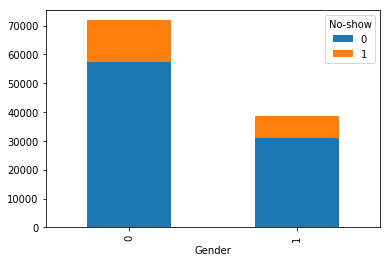

In [91]:
numberOfGenderwiseNoshow.unstack().plot(kind='bar',stacked=True)
plt.show()

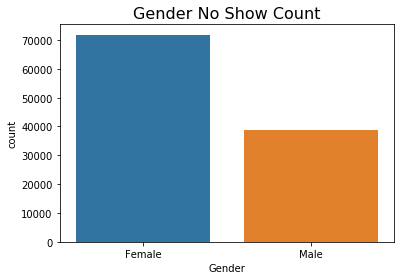

In [88]:
ax = sns.countplot(noshowdata_new.Gender.replace({0:'Female',1:'Male'}));
ax.set_title('Gender No Show Count',fontsize=16);

## No-show overview on all aspects

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA35518>,
      dtype=object)

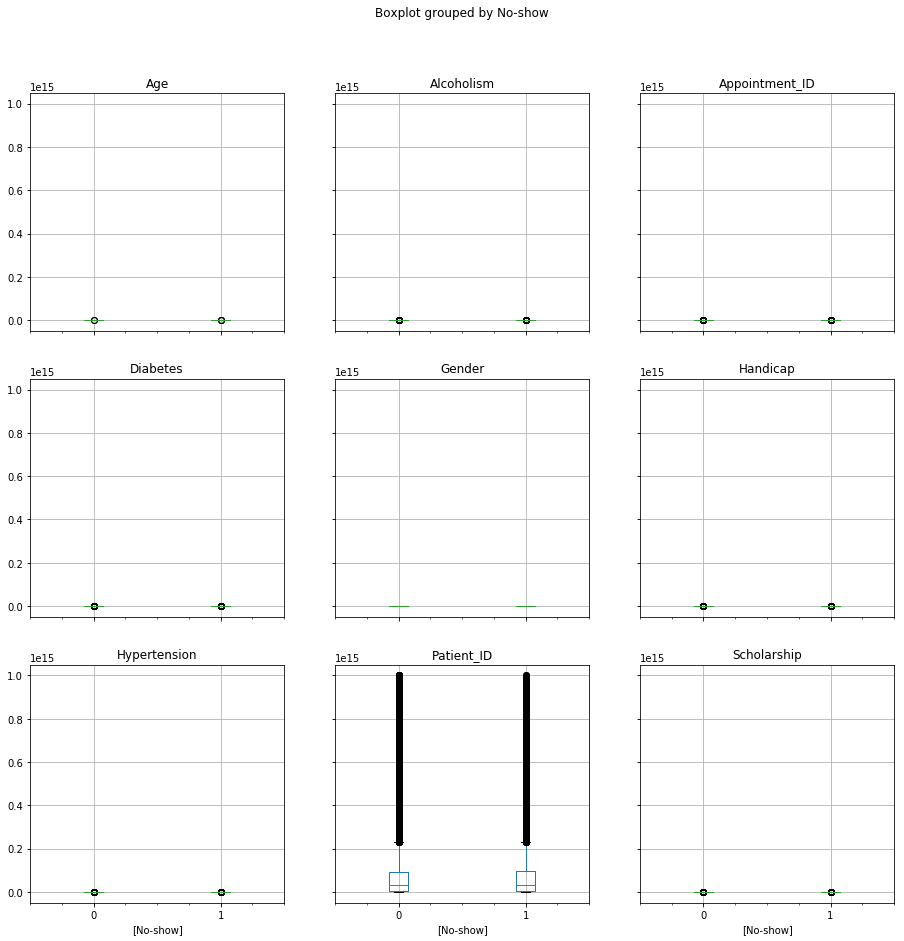

In [92]:
# boxplot on each feature split out by No-show
noshowdata_new.boxplot(by="No-show",figsize=(15,15))

### Research Question 3: Neighbourhood effects the show up

In [102]:
totalNeighbourhoodCnt = noshowdata_new['Neighbourhood'].value_counts().count()
print('Total number of neighbourhoods: ',totalNeighbourhoodCnt)

Total number of neighbourhoods:  81


Now we will check these neighbourhoods with number of appointments.

In [106]:
neighbourhood_appointments_cnt = noshowdata_new['Neighbourhood'].value_counts()
print('Neighbourhood with number of appointments: \n',neighbourhood_appointments_cnt)

Neighbourhood with number of appointments: 
 JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO      

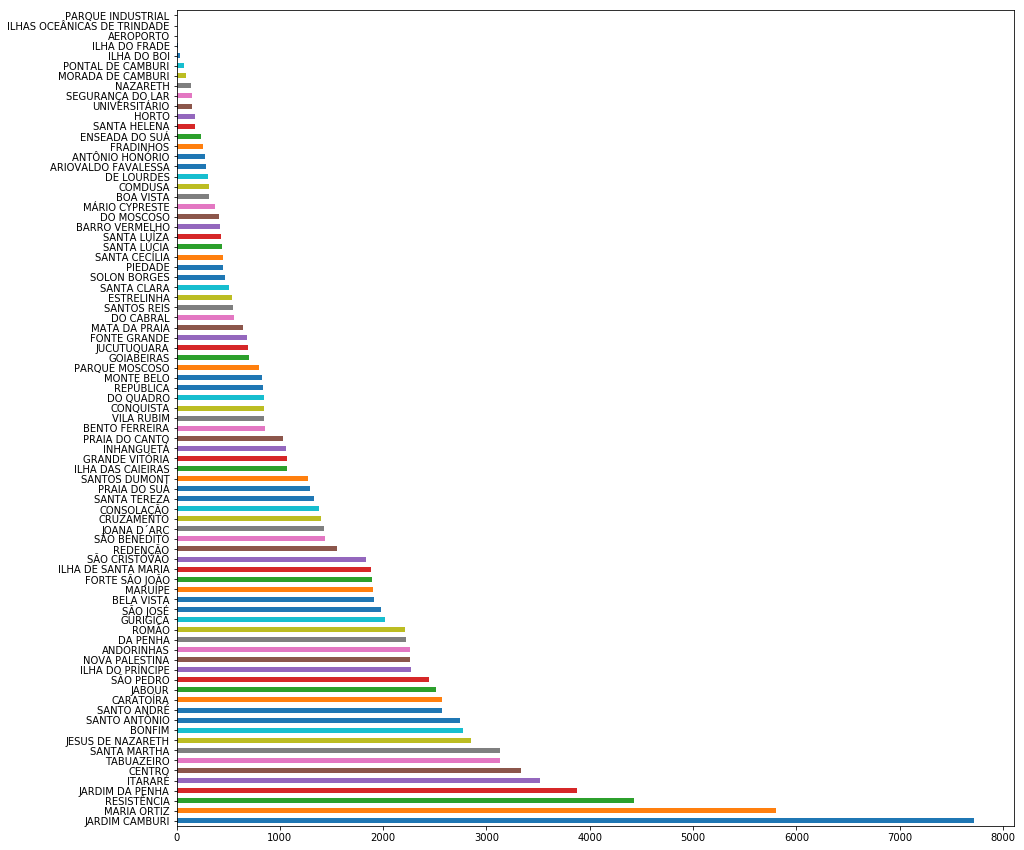

In [107]:
neighbourhood_appointments_cnt.plot(kind='barh',figsize=(15,15))
plt.show()

In [32]:
neighbourhood_noshow = pd.crosstab(noshowdata_new.Neighbourhood, noshowdata_new['No-show'], margins=True, normalize =True)
print('\n\n',neighbourhood_noshow)



 No-show                     0         1       All
Neighbourhood                                    
AEROPORTO            0.000063  0.000009  0.000072
ANDORINHAS           0.015752  0.004714  0.020466
ANTÔNIO HONÓRIO      0.002000  0.000452  0.002452
ARIOVALDO FAVALESSA  0.001990  0.000561  0.002551
BARRO VERMELHO       0.003004  0.000823  0.003827
BELA VISTA           0.013779  0.003474  0.017254
BENTO FERREIRA       0.006017  0.001746  0.007763
BOA VISTA            0.002298  0.000525  0.002823
BONFIM               0.020113  0.004976  0.025089
CARATOÍRA            0.017860  0.005347  0.023207
CENTRO               0.023804  0.006360  0.030165
COMDUSA              0.002298  0.000507  0.002805
CONQUISTA            0.006234  0.001448  0.007681
CONSOLAÇÃO           0.010305  0.002144  0.012449
CRUZAMENTO           0.009898  0.002750  0.012648
DA PENHA             0.016177  0.003881  0.020058
DE LOURDES           0.002334  0.000425  0.002760
DO CABRAL            0.004270  0.000796  0.0050

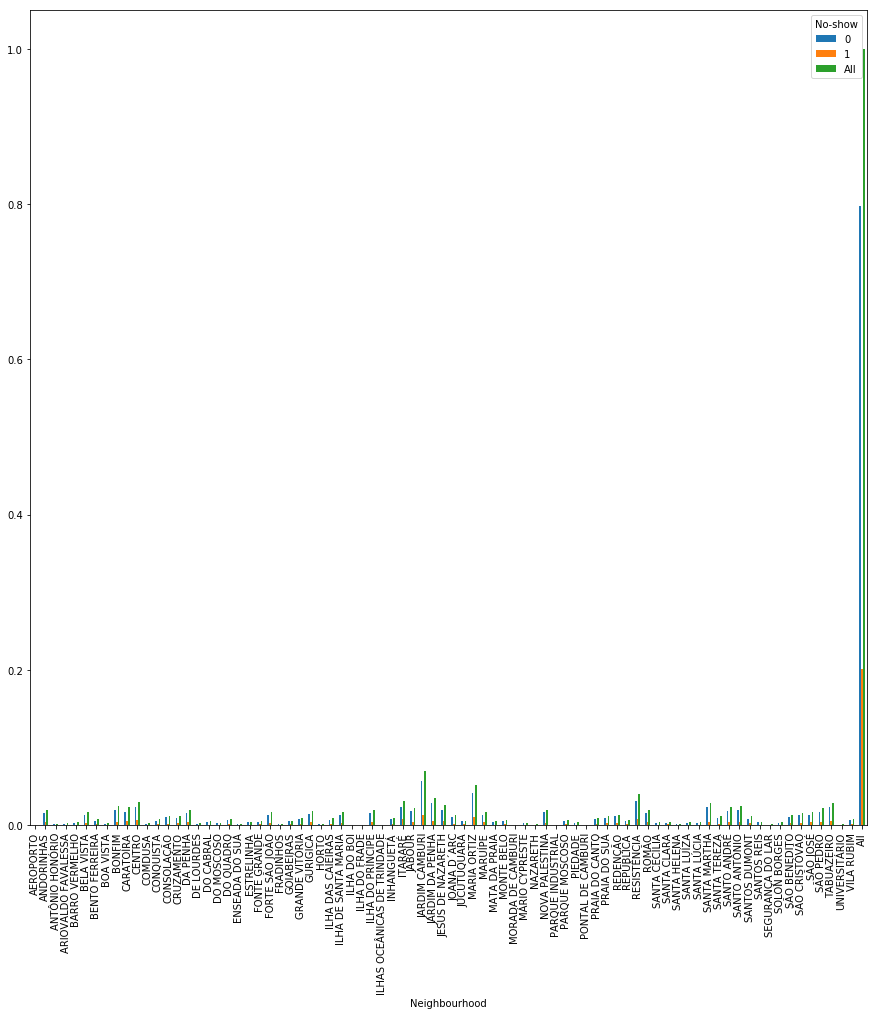

In [34]:
neighbourhood_noshow.plot(kind='bar',figsize=(15,15))
plt.show()

C:\Users\divya.baria\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


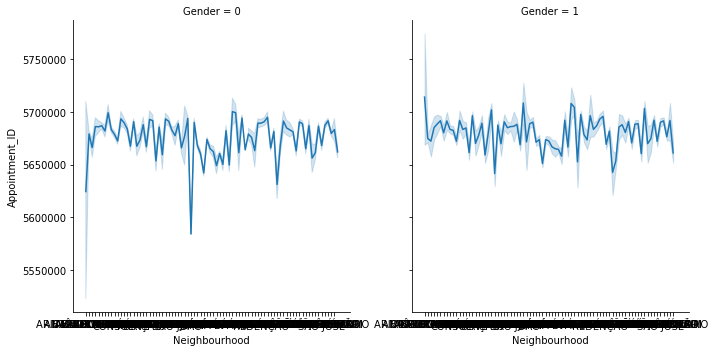

In [115]:
# Representation of neighbourhood with Appointments, here we come to know which neighbourhood has highest appointments
sns.relplot(x="Neighbourhood", y="Appointment_ID", kind='line',col="Gender",data=noshowdata_new);
plt.show()

### Research Question 4: Weekdays Show-up

    First we will create a Weekdays column.

In [42]:
# add column for Weekday
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
appDays = []
for x in noshowdata_new['AppointmentDay']:
    wd = weekDays[x.weekday()]
    #print(wd)
    appDays.append(wd)
#print(appDays)    
    #print(noshowdata_new['Weekdays'])
noshowdata_new['Weekdays'] = appDays   
noshowdata_new.head(3)

,Patient_ID,Appointment_ID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,No-show,Weekdays
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Friday
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Friday
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Friday


In [43]:
weekDaysAppCnts = noshowdata_new['Weekdays'].value_counts()
print(weekDaysAppCnts)

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: Weekdays, dtype: int64


WeekDays Appointments:
Least number of appoinments are on Saturday
Maximum number of Appointments are on Monday, Tuesday and Wednesday
Medium number of Appointments are on Thursday and Friday

Graphical representation of the same:

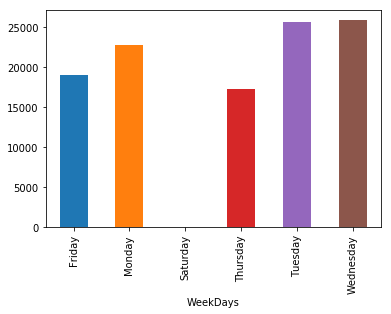

In [44]:
weekDaysAppCnts.sort_index(ascending=True).plot(kind='bar')
plt.xlabel('WeekDays')
plt.show()

Graphical Representation of no-show weekdaywise

C:\Users\divya.baria\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


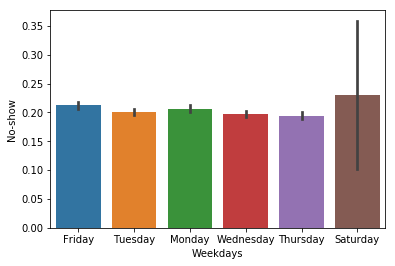

In [45]:
sns.barplot(y='No-show', x='Weekdays', data=noshowdata_new)
plt.show()

### Research Question 4: How many with scholarship no-show for the appointment

First will we find the detail figures of people with scholarship show-up, then we will work on the grahical representation

In [64]:
print(pd.crosstab([noshowdata_new['No-show'], noshowdata_new['Gender']], noshowdata_new.Scholarship,  margins=True))

Scholarship         0      1     All
No-show Gender                      
0       0       50499   6747   57246
        1       29426   1536   30962
1       0       12488   2106   14594
        1        7253    472    7725
All             99666  10861  110527


Graphical Representation

C:\Users\divya.baria\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


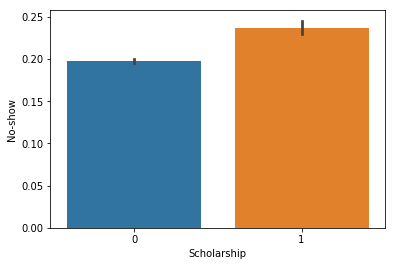

In [46]:
sns.barplot(y='No-show', x='Scholarship', data=noshowdata_new)
plt.show()

From the above representation we come to know people with scholarship have showed-up more for appointments

C:\Users\divya.baria\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


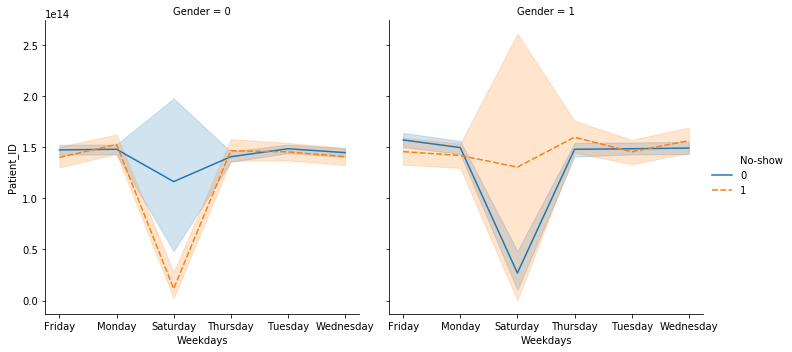

In [48]:
sns.relplot(x="Weekdays", y="Patient_ID", hue="No-show",style='No-show',col='Gender',kind='line',data=noshowdata_new);
plt.show()

### Research Question 5: Patients Types that have showed-up for the appointment

We will be using pivot_table to understand this.

Types of patients:
1) Hypertension
2) Diabetes
3) Alcoholism
4) Handicap

Using pivot_table we will give detail description on type, gender and no-show

In [69]:
#Pivot the dataset
patientTypeNoshowGender = noshowdata_new.pivot_table(values=['Hypertension','Diabetes','Alcoholism','Handicap'],index=['No-show','Gender'],aggfunc=np.sum)
print(patientTypeNoshowGender)

                Alcoholism  Diabetes  Handicap  Hypertension
No-show Gender                                              
0       0              915      4589      1133         12682
        1             1768      1924       873          5347
1       0              308      1017       271          2657
        1              369       413       182          1115


In [50]:
#Pivot the dataset
patientTypeNoshowGenderWeekDaysScholarship = noshowdata_new.pivot_table(values=['Hypertension','Diabetes','Alcoholism','Handicap'],index=['No-show','Gender','Weekdays','Scholarship'],aggfunc=np.sum)
print(noshow_pivottable)

                                      Alcoholism  Diabetes  Handicap  \
No-show Gender Weekdays  Scholarship                                   
0       0      Friday    0                   109       764       182   
                         1                    57        51        26   
               Monday    0                   111       753       184   
                         1                    54       100        27   
               Saturday  0                     1         2         0   
                         1                     0         0         0   
               Thursday  0                    96       660       183   
                         1                    50        73        11   
               Tuesday   0                   142      1041       246   
                         1                    61        84        24   
               Wednesday 0                   149       965       220   
                         1                    85        96      

In [55]:
#Pivot the dataset
patientTypeWeekdays = noshowdata_new.pivot_table(values=['Hypertension','Diabetes','Alcoholism','Handicap','Scholarship'],index=['No-show','Gender','Weekdays'],aggfunc=np.sum)
print(patientTypeWeekdays)

                          Alcoholism  Diabetes  Handicap  Hypertension  \
No-show Gender Weekdays                                                  
0       0      Friday            166       815       208          2139   
               Monday            165       853       211          2488   
               Saturday            1         2         0             9   
               Thursday          146       733       194          2080   
               Tuesday           203      1125       270          2985   
               Wednesday         234      1061       250          2981   
        1      Friday            326       361       170           927   
               Monday            379       390       172          1109   
               Saturday            1         3         1             6   
               Thursday          271       268       144           827   
               Tuesday           371       455       198          1264   
               Wednesday         420  

In [74]:
#noshowdata_new.groupby(['Weekdays','Gender'])['No-show'].size().unstack().plot(kind='line',stacked=True)
#plt.show()

### Research Question 6: Agewise no-show appointments

In [29]:
age_unique = noshowdata_new['Age'].unique()
age_unique.sort()
print(age_unique)

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


Text(0.5,0,'Population Ages')

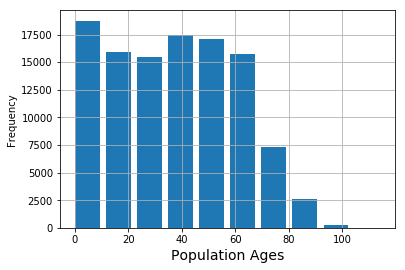

In [81]:
# Distribution of 'Age'
plt.figure();
age_hist = noshowdata_new['Age'].plot.hist(bins=10,rwidth=0.8).grid(True)
plt.xlabel('Population Ages',fontsize=14)

In [85]:
print(pd.crosstab(noshowdata_new['No-show'], noshowdata_new.Age,  margins=True))

Age      -1     0     1     2     3     4     5     6     7     8   ...    94  \
No-show                                                             ...         
0         1  2900  1858  1366  1236  1017  1169  1205  1126  1106   ...    27   
1         0   639   415   252   277   282   320   316   301   318   ...     6   
All       1  3539  2273  1618  1513  1299  1489  1521  1427  1424   ...    33   

Age      95  96  97  98  99  100  102  115     All  
No-show                                             
0        18  16   9   5   1    4    2    2   88208  
1         6   1   2   1   0    0    0    3   22319  
All      24  17  11   6   1    4    2    5  110527  

[3 rows x 105 columns]


Graphical Representation of Agewise no-show

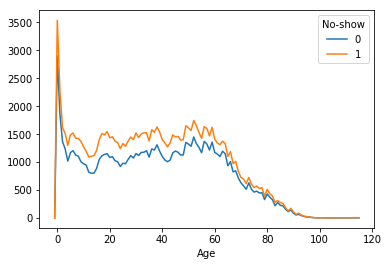

In [92]:
noshowdata_new.groupby(['Age','No-show'])['Patient_ID'].size().unstack().plot(kind='line',stacked=True)
plt.show()

### Research Question 7: Appointments of PatientTypes with respect to Age

1) Appointments of patients with Hypertension with respect to Age
1) Appointments of patients with Diabetes with respect to Age
1) Appointments of patients with Alcoholism with respect to Age
1) Appointments of patients with Handicap with respect to Age

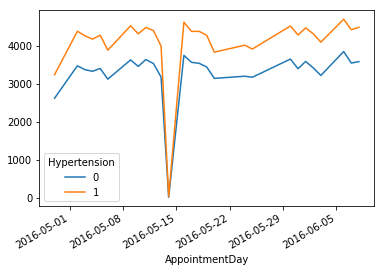

In [95]:
noshowdata_new.groupby(['AppointmentDay','Hypertension'])['Age'].size().unstack().plot(kind='line',stacked=True)
plt.show()

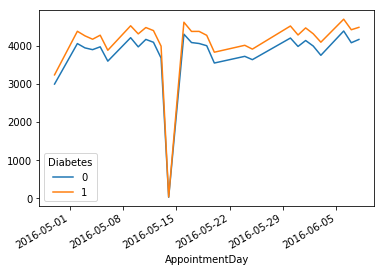

In [96]:
noshowdata_new.groupby(['AppointmentDay','Diabetes'])['Age'].size().unstack().plot(kind='line',stacked=True)
plt.show()

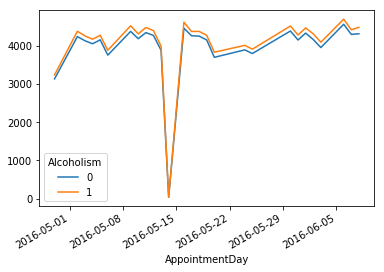

In [97]:
noshowdata_new.groupby(['AppointmentDay','Alcoholism'])['Age'].size().unstack().plot(kind='line',stacked=True)
plt.show()

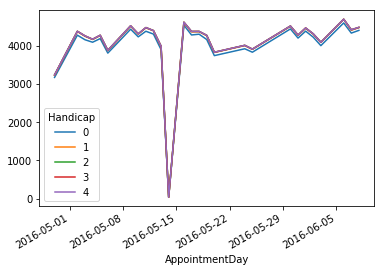

In [98]:
noshowdata_new.groupby(['AppointmentDay','Handicap'])['Age'].size().unstack().plot(kind='line',stacked=True)
plt.show()